In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

calibration.pkl  exists.
file exists, loading
2174


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17766,2019-01-30,BPL,Tottenham Hotspur,Watford,2,1,1.75,0.74,2.25,1.04
17810,2019-02-02,BPL,Tottenham Hotspur,Newcastle,1,0,3.07,0.56,2.58,0.58
17825,2019-02-02,BPL,Crystal Palace,Fulham,2,0,2.17,0.60,1.54,0.90
17833,2019-02-02,BPL,Burnley,Southampton,1,1,2.27,0.82,1.64,1.13
17835,2019-02-02,BPL,Chelsea,Huddersfield Town,5,0,3.15,0.35,3.56,0.56
17847,2019-02-02,BPL,Everton,Wolverhampton,1,3,1.21,1.64,1.29,0.57
17859,2019-02-02,BPL,Brighton and Hove Albion,Watford,0,0,2.14,0.33,2.15,0.84
17879,2019-02-02,BPL,Cardiff City,AFC Bournemouth,2,0,2.21,0.47,0.97,2.19
17929,2019-02-03,BPL,Leicester City,Manchester United,0,1,1.89,1.31,2.11,0.96
17943,2019-02-03,BPL,Manchester City,Arsenal,3,1,2.83,0.64,2.64,0.60


In [3]:
print(calibrator.raw_data['League'].unique())
calibrator.raw_data.loc[calibrator.raw_data['League']=='ELC'];

['FL1' 'BPL' 'SPD' 'ISA' 'GB' 'UCL' 'MPDTC' 'MLS' 'SA' 'NT' 'NWSL' 'BSA'
 'RPL' 'MPDTA' 'ATB' 'SRSL' 'FL2' 'G2B' 'ELC' 'SP' 'PL' 'DE' 'TTSL' 'SSD'
 'ISB' 'APD' 'UEL' 'USL' 'DS' 'BJL' 'JJL' 'CSL' 'ELO' 'SAAPL' 'ELT' 'GSL'
 'AA']


In [4]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,30.1,21,38,5,1,43.74,70.68,5.31,0.32,4.32,3.6108
SPD,0,29.4,21,38,6,1,36.08,65.83,4.40,0.26,5.24,3.2560
BPL,0,22.6,14,31,9,1,5.34,16.19,3.43,0.32,36.70,2.3324
ELC,0,22.2,14,31,9,1,5.81,15.60,5.00,0.50,40.79,2.5000
ISA,0,22.0,14,31,9,2,4.00,13.08,3.08,0.30,40.99,2.1560
PL,0,20.8,12,29,9,2,2.84,9.38,3.46,0.37,50.84,2.1798
DE,0,18.3,10,27,9,3,1.01,4.21,4.08,0.51,69.08,1.9992
RPL,0,17.9,10,27,9,3,0.84,3.32,3.39,0.44,72.17,1.8984
FL1,0,16.6,9,25,9,3,0.34,1.71,3.56,0.50,79.87,1.7800


In [6]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
# home_advantage=np.array([0,1])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0.03588097 0.82683234]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,61,94.8,88,101,2,1,82.03,100.00,5.56,0.17,0.00
Manchester City,59,89.3,83,96,3,1,17.39,99.98,6.50,0.26,0.00
Tottenham Hotspur,57,81.7,75,88,4,2,0.58,97.77,4.84,0.29,0.00
Chelsea,50,71.8,65,79,6,3,0.00,44.14,4.07,0.31,0.00
Manchester United,48,70.5,63,78,6,4,0.00,30.08,4.94,0.40,0.00
Arsenal,47,70.1,62,78,6,4,0.00,27.91,4.97,0.44,0.00
Wolverhampton,38,57.8,51,65,10,6,0.00,0.11,3.38,0.37,0.00
Watford,34,51.1,44,58,13,7,0.00,0.00,3.24,0.42,0.00
Leicester City,32,50.1,43,57,14,7,0.00,0.00,2.84,0.36,0.00
AFC Bournemouth,33,49.1,42,56,14,8,0.00,0.00,3.55,0.50,0.01


In [30]:
PremierLeague=League['BPL']
team_name='Manchester United'
match_id = PremierLeague.match_id['Arsenal v Manchester United']
ind = PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id]
match_id = PremierLeague.match_id['Manchester United v Chelsea']
ind = ind &( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])
match_id = PremierLeague.match_id['Fulham v Manchester United']
ind = ( PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
print(100*ind.sum()/ind.size)
PremierLeague.season_report(ind=None)

69.332


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,61,94.8,88,101,2,1,82.03,100.00,5.56,0.17,0.00
Manchester City,59,89.3,83,96,3,1,17.39,99.98,6.50,0.26,0.00
Tottenham Hotspur,57,81.7,75,88,4,2,0.58,97.77,4.84,0.29,0.00
Chelsea,50,71.8,65,79,6,3,0.00,44.14,4.07,0.31,0.00
Manchester United,48,70.5,63,78,6,4,0.00,30.08,4.94,0.40,0.00
Arsenal,47,70.1,62,78,6,4,0.00,27.91,4.97,0.44,0.00
Wolverhampton,38,57.8,51,65,10,6,0.00,0.11,3.38,0.37,0.00
Watford,34,51.1,44,58,13,7,0.00,0.00,3.24,0.42,0.00
Leicester City,32,50.1,43,57,14,7,0.00,0.00,2.84,0.36,0.00
AFC Bournemouth,33,49.1,42,56,14,8,0.00,0.00,3.55,0.50,0.01


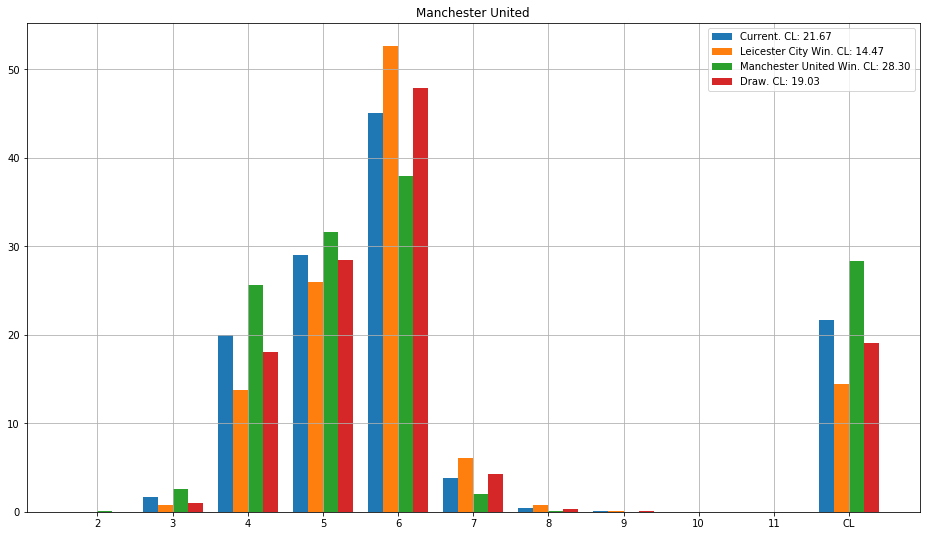

In [10]:
PremierLeague=League['BPL']
_,fig=PremierLeague.what_if('Leicester City v Manchester United',ref_team='Manchester United')

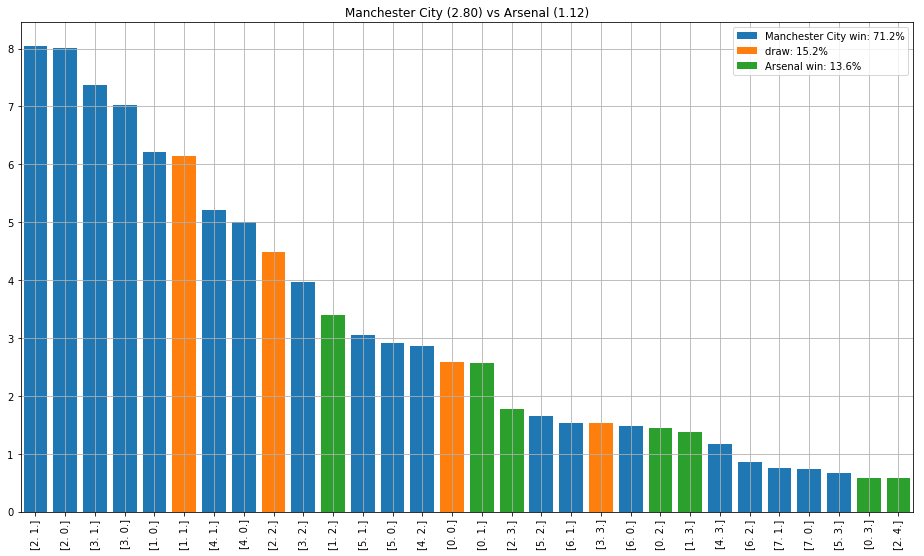

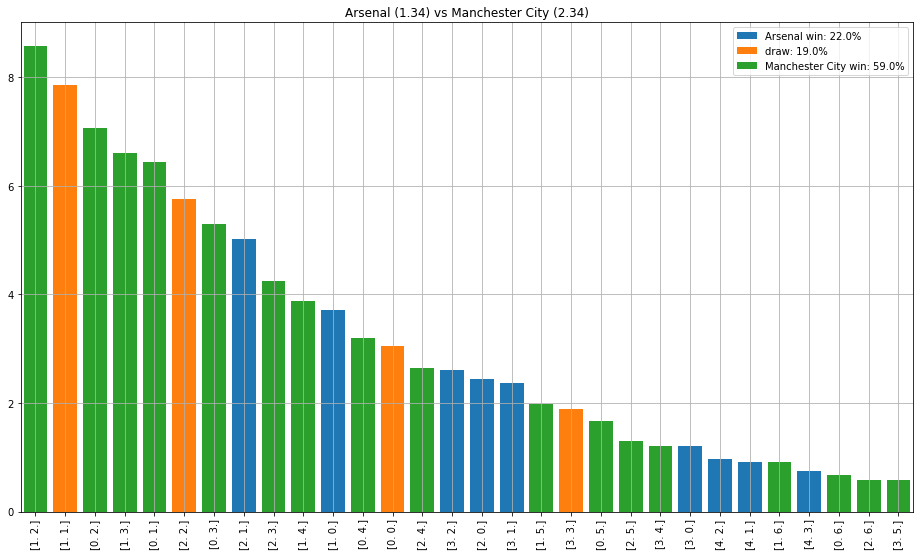

In [17]:
team1=teams['Manchester United']
team1=teams['Manchester City']
team2=teams['Brighton and Hove Albion']
team2=teams['Chelsea']
team2=teams['Arsenal']
#team2=teams['Leicester City']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

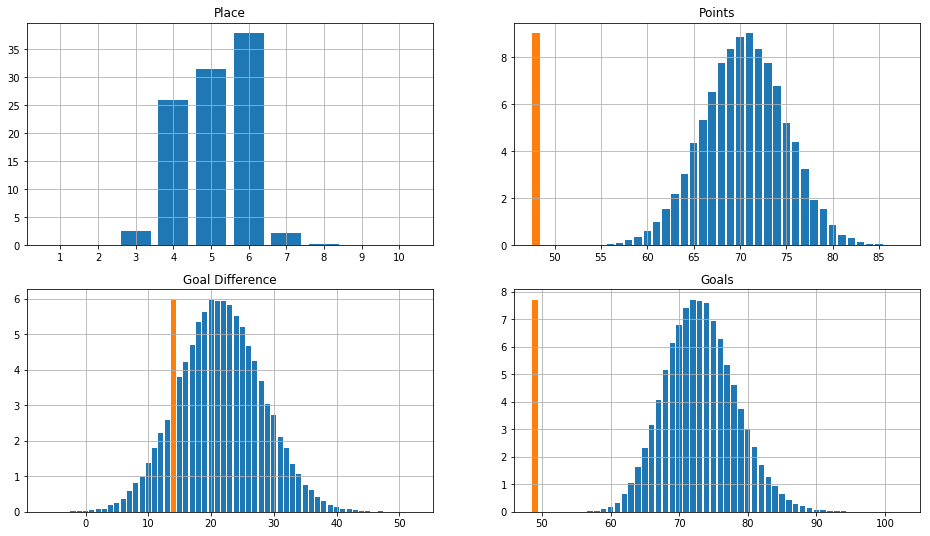

In [16]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

# Most important matches

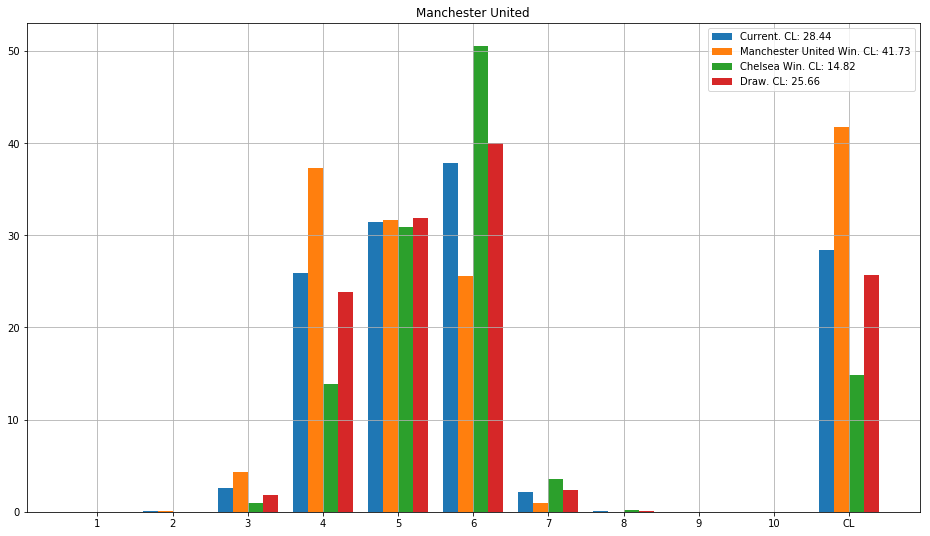

In [7]:
imp=[]
ref_team='Manchester United'
# ref_team='Liverpool'
# ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl,_=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    #imp.append(pcl.std())
    imp.append(np.abs(pcl[1:-1]-pcl[0]).mean())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
pcl,fig=PremierLeague.what_if(the_match,ref_team=ref_team)

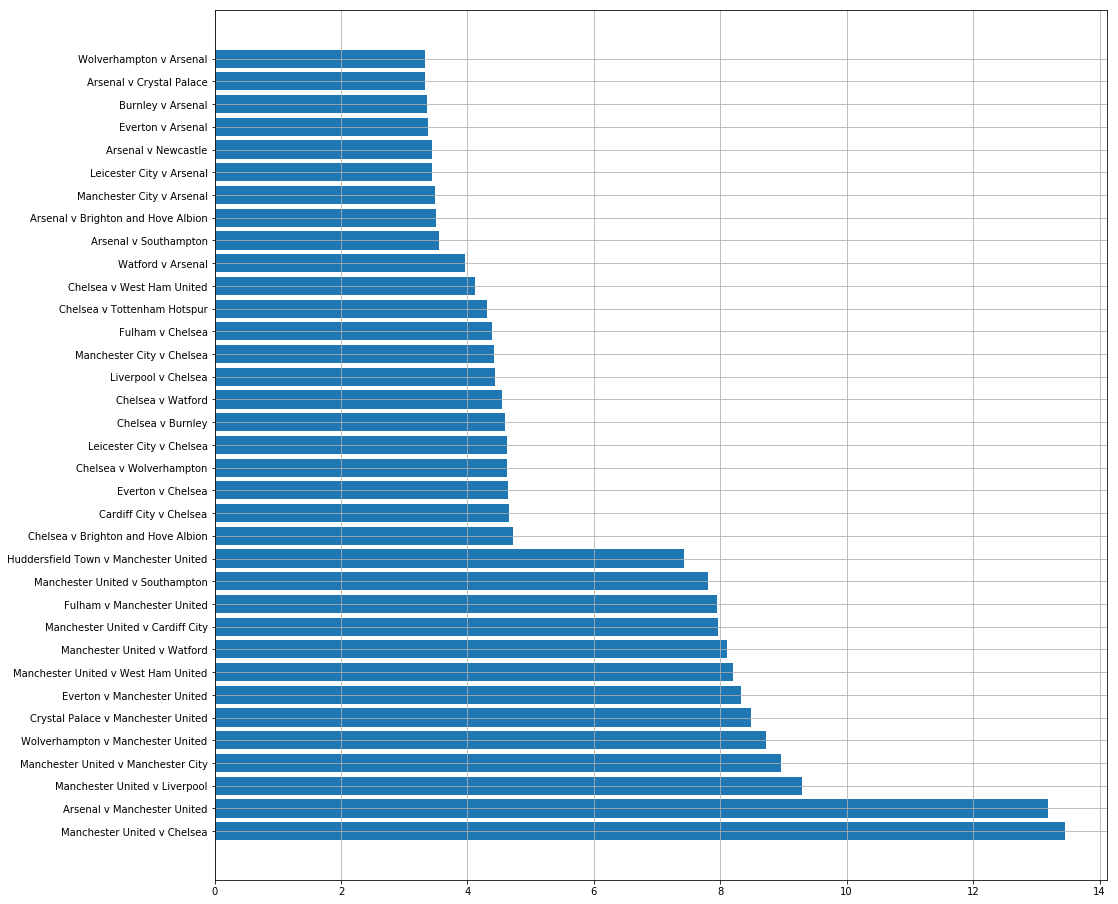

In [8]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(35)
plt.barh(xx,imp[xx])
plt.yticks(xx,matches[xx],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.72726

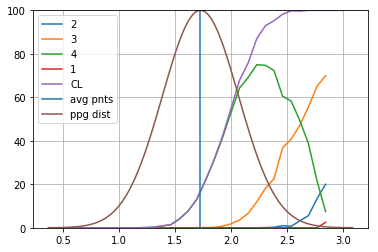

In [9]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    
ind = np.isnan(p[:,3])
p[ind,3]=np.interp(nrpnts[ind],nrpnts[~ind],p[~ind,3])

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
mu=pnts.mean()/n
plt.axvline(mu,label='avg pnts')
s=(pnts/n).std()
from scipy.stats import norm
x=np.linspace(mu-4*s,mu+4*s,100)
y=norm.pdf((x-mu)/s)
y=100*y/y.max()
plt.plot(x,y,label='ppg dist')
plt.legend()
pnts.mean()/n

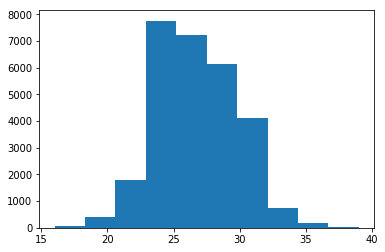

In [11]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
ind=PremierLeague.place_per_team[i,:]<=4
plt.hist((PremierLeague.points_per_team[i,ind]-PremierLeague.current_points[team_name]),10);

In [15]:
def points(x):
    return 3*x[0]+x[1]

def prob(x):
    return np.round(100*np.interp(points(x),nrpnts,p[:,3]),2)
    

[(nW,nD,n-nW-nD,points((nW,nD)),prob((nW,nD))) for nW in range(n+1) for nD in range(n+1) if n-nW-nD>=0 and prob((nW,nD))>=20]

[(5, 8, 0, 23, 21.51),
 (6, 5, 2, 23, 21.51),
 (6, 6, 1, 24, 30.92),
 (6, 7, 0, 25, 41.95),
 (7, 2, 4, 23, 21.51),
 (7, 3, 3, 24, 30.92),
 (7, 4, 2, 25, 41.95),
 (7, 5, 1, 26, 54.82),
 (7, 6, 0, 27, 67.88),
 (8, 0, 5, 24, 30.92),
 (8, 1, 4, 25, 41.95),
 (8, 2, 3, 26, 54.82),
 (8, 3, 2, 27, 67.88),
 (8, 4, 1, 28, 75.82),
 (8, 5, 0, 29, 86.96),
 (9, 0, 4, 27, 67.88),
 (9, 1, 3, 28, 75.82),
 (9, 2, 2, 29, 86.96),
 (9, 3, 1, 30, 92.91),
 (9, 4, 0, 31, 95.22),
 (10, 0, 3, 30, 92.91),
 (10, 1, 2, 31, 95.22),
 (10, 2, 1, 32, 98.22),
 (10, 3, 0, 33, 99.77),
 (11, 0, 2, 33, 99.77),
 (11, 1, 1, 34, 99.68),
 (11, 2, 0, 35, 100.0),
 (12, 0, 1, 36, 100.0),
 (12, 1, 0, 37, 100.0),
 (13, 0, 0, 39, 100.0)]